In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook



Selected:
 
76 patients
 
106  samples

read with request
```
# private
requests.get('https://raw.github.com/myfile.txt', auth=('username', 'passwd'))

# public
>>> import requests
>>> r = requests.get('https://github.com/kennethreitz/requests/blob/master/README.rst')
>>> 'Requests:' in r.text
True
>>> r.headers['Content-Type']
'text/html; charset=utf-8'
>>> r = requests.get('https://raw.github.com/kennethreitz/requests/master/README.rst')
>>> 'Requests:' in r.text
True
>>> r.headers['Content-Type']
'text/plain; charset=utf-8'
>>> print r.text
Requests: HTTP for Humans
```

In [ ]:
# read directly to pandas

ntrk_cancer_type_url = "https://raw.githubusercontent.com/mgviz/cbioportal_tutorial/scratch1/data/Cancer_Type.txt"

df = pd.read_csv(ntrk_cancer_type_url, sep="\t")
df

,Study ID,Patient ID,Sample ID,Cancer Type
0,ntrk_msk_2019,P-0000104,P-0000104-T02-IM6,Breast Cancer
1,ntrk_msk_2019,P-0000104,P-0000104-T03-AS1,Breast Cancer
2,ntrk_msk_2019,P-0002671,P-0002671-T01-IM3,Colorectal Cancer
3,ntrk_msk_2019,P-0002978,P-0002978-T02-IM5,Salivary Gland Cancer
4,ntrk_msk_2019,P-0003329,P-0003329-T01-IM5,Hepatobiliary Cancer
...,...,...,...,...
101,ntrk_msk_2019,P-0012463,P-0012463-T03-IM6,Glioma
102,ntrk_msk_2019,P-0003368,P-0003368-T02-AS1,Non-Small Cell Lung Cancer
103,ntrk_msk_2019,P-0012465,P-0012465-T01-AS1,Cancer of Unknown Primary
104,ntrk_msk_2019,P-C1,P-C1,Cancer of Unknown Primary


In [ ]:
df["Patient ID"].unique()

array(['P-0000104', 'P-0002671', 'P-0002978', 'P-0003329', 'P-0003705',
       'P-0004737', 'P-0006480', 'P-0007050', 'P-0007739', 'P-0007772',
       'P-0007911', 'P-0009855', 'P-0010086', 'P-0010264', 'P-0010562',
       'P-0010581', 'P-0010628', 'P-0010668', 'P-0013121', 'P-0013196',
       'P-0013559', 'P-0013664', 'P-0014143', 'P-0014859', 'P-0014872',
       'P-0016347', 'P-0016507', 'P-0018060', 'P-0018082', 'P-0021170',
       'P-0021262', 'P-0021467', 'P-0021974', 'P-0022467', 'P-0022925',
       'P-0023215', 'P-0023257', 'P-0023987', 'P-0023994', 'P-0024549',
       'P-0025507', 'P-0025815', 'P-0025987', 'P-0026286', 'P-0026375',
       'P-0026390', 'P-0027006', 'P-0029326', 'P-0029892', 'P-0003670',
       'P-0005935', 'P-0007552', 'P-0008457', 'P-0008951', 'P-0013321',
       'P-0013859', 'P-0017925', 'P-0019247', 'P-0019359', 'P-0021124',
       'P-0021795', 'P-0026177', 'P-0026354', 'P-0026357', 'P-0026696',
       'P-0027277', 'P-0027278', 'P-0027671', 'P-0029496', 'P-00

In [ ]:
df["Patient ID"].nunique()

76

In [ ]:
df["Patient ID"].value_counts()

P-0000104    2
P-0025987    2
P-0021170    2
P-0021262    2
P-0021467    2
            ..
P-0007050    1
P-0006480    1
P-0003670    1
P-0014143    1
P-C2         1
Name: Patient ID, Length: 76, dtype: int64

In [ ]:
df["Cancer Type"].value_counts()


Thyroid Cancer                16
Soft Tissue Sarcoma           14
Salivary Gland Cancer         13
Non-Small Cell Lung Cancer     9
Breast Cancer                  8
Colorectal Cancer              8
Melanoma                       7
Cancer of Unknown Primary      7
Glioma                         6
Pancreatic Cancer              5
Miscellaneous Brain Tumor      5
Hepatobiliary Cancer           3
Uterine Sarcoma                3
Appendiceal Cancer             1
Breast Sarcoma                 1
Name: Cancer Type, dtype: int64

In [ ]:
## value_counts to df https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
## df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
## df = df.value_counts().rename_axis('unique_values').to_frame('counts')

sample_prop_df = df["Cancer Type"].value_counts().rename_axis('cancer_type').reset_index(name="counts")
sample_prop_df

# add proportion
## >>> p['perc']= p['score']/p['score'].sum()  [https://stackoverflow.com/questions/23539832/how-to-calculate-percentage-with-pandas-dataframe]

sample_prop_df['ratio'] = np.round(sample_prop_df['counts'] / sample_prop_df['counts'].sum(), decimals=2)
sample_prop_df





,cancer_type,counts,ratio
0,Thyroid Cancer,16,0.15
1,Soft Tissue Sarcoma,14,0.13
2,Salivary Gland Cancer,13,0.12
3,Non-Small Cell Lung Cancer,9,0.08
4,Breast Cancer,8,0.08
5,Colorectal Cancer,8,0.08
6,Melanoma,7,0.07
7,Cancer of Unknown Primary,7,0.07
8,Glioma,6,0.06
9,Pancreatic Cancer,5,0.05


In [ ]:
sample_prop_df['percent'] =  np.round(sample_prop_df['ratio'] * 100, decimals=2)
sample_prop_df

,cancer_type,counts,ratio,percent
0,Thyroid Cancer,16,0.15,15.0
1,Soft Tissue Sarcoma,14,0.13,13.0
2,Salivary Gland Cancer,13,0.12,12.0
3,Non-Small Cell Lung Cancer,9,0.08,8.0
4,Breast Cancer,8,0.08,8.0
5,Colorectal Cancer,8,0.08,8.0
6,Melanoma,7,0.07,7.0
7,Cancer of Unknown Primary,7,0.07,7.0
8,Glioma,6,0.06,6.0
9,Pancreatic Cancer,5,0.05,5.0


## Per individual


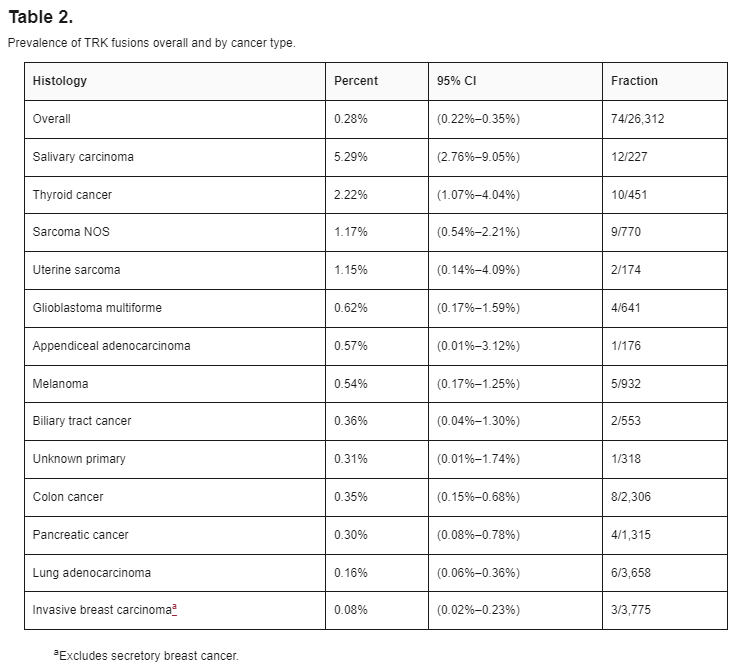

In [ ]:
# cancer type grouped by cancer id

df.groupby(["Patient ID","Cancer Type"])["Patient ID"].nunique()

Patient ID  Cancer Type               
P-0000104   Breast Cancer                 1
P-0002671   Colorectal Cancer             1
P-0002978   Salivary Gland Cancer         1
P-0003329   Hepatobiliary Cancer          1
P-0003368   Non-Small Cell Lung Cancer    1
                                         ..
P-0029892   Hepatobiliary Cancer          1
P-0031128   Uterine Sarcoma               1
P-0032222   Miscellaneous Brain Tumor     1
P-C1        Cancer of Unknown Primary     1
P-C2        Cancer of Unknown Primary     1
Name: Patient ID, Length: 80, dtype: int64

In [ ]:
df.groupby(["Patient ID","Cancer Type"])["Patient ID"].unique()

Patient ID  Cancer Type               
P-0000104   Breast Cancer                 [P-0000104]
P-0002671   Colorectal Cancer             [P-0002671]
P-0002978   Salivary Gland Cancer         [P-0002978]
P-0003329   Hepatobiliary Cancer          [P-0003329]
P-0003368   Non-Small Cell Lung Cancer    [P-0003368]
                                             ...     
P-0029892   Hepatobiliary Cancer          [P-0029892]
P-0031128   Uterine Sarcoma               [P-0031128]
P-0032222   Miscellaneous Brain Tumor     [P-0032222]
P-C1        Cancer of Unknown Primary          [P-C1]
P-C2        Cancer of Unknown Primary          [P-C2]
Name: Patient ID, Length: 80, dtype: object

In [ ]:
df.groupby(["Cancer Type"])["Patient ID"].nunique()

Cancer Type
Appendiceal Cancer             1
Breast Cancer                  4
Breast Sarcoma                 1
Cancer of Unknown Primary      7
Colorectal Cancer              7
Glioma                         4
Hepatobiliary Cancer           2
Melanoma                       5
Miscellaneous Brain Tumor      3
Non-Small Cell Lung Cancer     8
Pancreatic Cancer              4
Salivary Gland Cancer         10
Soft Tissue Sarcoma           11
Thyroid Cancer                10
Uterine Sarcoma                3
Name: Patient ID, dtype: int64

In [ ]:
! wget https://github.com/mgviz/cbioportal_tutorial/raw/scratch1/data/ntrk_msk_2019.tar.gz

--2022-10-17 02:49:35--  https://github.com/mgviz/cbioportal_tutorial/raw/scratch1/data/ntrk_msk_2019.tar.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mgviz/cbioportal_tutorial/scratch1/data/ntrk_msk_2019.tar.gz [following]
--2022-10-17 02:49:35--  https://raw.githubusercontent.com/mgviz/cbioportal_tutorial/scratch1/data/ntrk_msk_2019.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81865 (80K) [application/octet-stream]
Saving to: ‘ntrk_msk_2019.tar.gz’

ntrk_msk_2019.tar.g 100%[===================>]  79.95K  --.-KB/s    in 0.008s  

2022-10-17 02:49:35 (10.1 MB/s) - ‘ntrk_msk_2019.

In [ ]:
! tar -zxvf ntrk_msk_2019.tar.gz

ntrk_msk_2019/
ntrk_msk_2019/data_cna_hg19.seg
ntrk_msk_2019/meta_cna_hg19_seg.txt
ntrk_msk_2019/data_sv.txt
ntrk_msk_2019/meta_study.txt
ntrk_msk_2019/meta_clinical_sample.txt
ntrk_msk_2019/meta_gene_panel_matrix.txt
ntrk_msk_2019/case_lists/
ntrk_msk_2019/case_lists/cases_cna.txt
ntrk_msk_2019/case_lists/cases_cnaseq.txt
ntrk_msk_2019/case_lists/cases_all.txt
ntrk_msk_2019/case_lists/cases_sequenced.txt
ntrk_msk_2019/case_lists/cases_sv.txt
ntrk_msk_2019/data_timeline.txt
ntrk_msk_2019/data_gene_panel_matrix.txt
ntrk_msk_2019/data_mutations.txt
ntrk_msk_2019/data_cna.txt
ntrk_msk_2019/data_clinical_patient.txt
ntrk_msk_2019/meta_sv.txt
ntrk_msk_2019/meta_timeline.txt
ntrk_msk_2019/meta_clinical_patient.txt
ntrk_msk_2019/meta_mutations.txt
ntrk_msk_2019/data_clinical_sample.txt
ntrk_msk_2019/LICENSE
ntrk_msk_2019/meta_cna.txt


In [ ]:
! head ntrk_msk_2019/meta_sv.txt

cancer_study_identifier: ntrk_msk_2019
genetic_alteration_type: STRUCTURAL_VARIANT
datatype: SV
stable_id: structural_variants
show_profile_in_analysis_tab: true
profile_name: Structural variants
profile_description: Structural Variant Data.
data_filename: data_sv.txt

In [ ]:
! head ntrk_msk_2019/case_lists/cases_sv.txt

cancer_study_identifier: ntrk_msk_2019
stable_id: ntrk_msk_2019_sv
case_list_name: Samples with SV data
case_list_description: All samples (106 samples)
case_list_category: all_cases_with_sv_data
case_list_ids: P-0016347-T01-IM6	P-0021795-T02-AS1	P-0010086-T01-IM5	P-0029496-T02-AS1	P-0016347-T02-AS1	P-0026354-T01-IM6	P-0019359-T01-AS1	P-0016507-T01-IM6	P-0000104-T03-AS1	P-0014872-T01-AS1	P-0021124-T02-AS1	P-0013321-T01-AS1	P-0023215-T01-IM6	P-0003670-T03-AS1	P-0005935-T02-AS1	P-0025815-T02-IM6	P-0031128-T01-AS1	P-0013121-T02-IM5	P-0023994-T03-AS1	P-0013559-T02-AS1	P-0012463-T03-IM6	P-0007772-T01-IM5	P-0010668-T01-IM5	P-0023215-T02-AS1	P-0021170-T01-AS1	P-0026286-T02-AS1	P-0026390-T01-IM6	P-0021170-T02-IM6	P-0012465-T01-AS1	P-0021974-T01-IM6	P-0023257-T01-IM6	P-0014872-T02-IM6	P-0025987-T01-IM6	P-0013859-T02-AS1	P-0026696-T01-IM6	P-0013559-T01-IM5	P-0003705-T01-IM5	P-0018060-T01-IM6	P-0002671-T01-IM3	P-0024549-T03-IM6	P-0013196-T01-AS1	P-0023987-T02-AS1	P-0007739-T01-IM5	P-0007911-T02-I

In [ ]:
! head ntrk_msk_2019/data_sv.txt

Sample_Id	SV_Status	Site1_Hugo_Symbol	Site2_Hugo_Symbol	Site2_Effect_On_Frame	Class	NCBI_Build	Comments	DNA_support	Event_Info
P-0021124-T02-AS1	SOMATIC	NTRK2	STRN	unknown	DELETION	GRCh37	POSITIVE FOR GENE FUSIONS IN THE INVESTIGATIONAL PANEL: STRN-NTRK2 fusion. Note: The rearrangement is an in-frame fusion between genes STRN Exon3 (NM_003162) and NTRK2 Exon16 (NM_006180). Lab Notes Run Number: ArcherV2-CLIN-20170060 Macro-dissection: Unknown	yes	NTRK2-STRN fusion
P-0019247-T02-AS1	SOMATIC	NTRK2	TRAF2	unknown	DELETION	GRCh37	POSITIVE FOR GENE FUSIONS IN THE INVESTIGATIONAL PANEL: TRAF2-NTRK2 fusion. Note: The rearrangement is an in-frame fusion between genes TRAF2 Exon9 (NM_021138) and NTRK2 Exon15 (NM_006180). Lab Notes Run Number: ArcherV2-CLIN-20170033 Macro-dissection: Not Performed	yes	NTRK2-TRAF2 fusion
P-0008457-T03-AS1	SOMATIC	NTRK2	BCR	unknown	INVERSION	GRCh37	POSITIVE FOR GENE FUSIONS IN THE INVESTIGATIONAL PANEL: BCR-NTRK2 fusion. Note: The rearrangement is an in-frame fusio

In [ ]:
sv_df = pd.read_csv("ntrk_msk_2019/data_sv.txt", sep="\t")
sv_df

,Sample_Id,SV_Status,Site1_Hugo_Symbol,Site2_Hugo_Symbol,Site2_Effect_On_Frame,Class,NCBI_Build,Comments,DNA_support,Event_Info
0,P-0021124-T02-AS1,SOMATIC,NTRK2,STRN,unknown,DELETION,GRCh37,POSITIVE FOR GENE FUSIONS IN THE INVESTIGATION...,yes,NTRK2-STRN fusion
1,P-0019247-T02-AS1,SOMATIC,NTRK2,TRAF2,unknown,DELETION,GRCh37,POSITIVE FOR GENE FUSIONS IN THE INVESTIGATION...,yes,NTRK2-TRAF2 fusion
2,P-0008457-T03-AS1,SOMATIC,NTRK2,BCR,unknown,INVERSION,GRCh37,POSITIVE FOR GENE FUSIONS IN THE INVESTIGATION...,yes,NTRK2-BCR fusion
3,P-0003670-T03-AS1,SOMATIC,NTRK3,SQSTM1,unknown,DELETION,GRCh37,Case already typed POSITIVE FOR THE FOLLOWING ...,yes,NTRK3-SQSTM1 fusion
4,P-0005935-T02-AS1,SOMATIC,NTRK3,ETV6,unknown,DELETION,GRCh37,POSITIVE FOR THE FOLLOWING GENE FUSION IN THE ...,yes,NTRK3-ETV6 fusion
...,...,...,...,...,...,...,...,...,...,...
119,P-0007552-T03-AS1,SOMATIC,NTRK3,TPM4,unknown,NaN,GRCh37,NaN,yes,NTRK3-TPM4 fusion
120,P-0012463-T03-IM6,SOMATIC,NTRK3,EML4,unknown,NaN,GRCh37,NaN,yes,NTRK3-EML4 fusion
121,P-0012465-T01-AS1,SOMATIC,NTRK3,TPM3,unknown,NaN,GRCh37,NaN,yes,NTRK3-TPM3 fusion
122,P-0025815-T02-IM6,SOMATIC,NTRK1,TPM3,unknown,NaN,GRCh37,NaN,yes,NTRK1-TPM3 fusion


In [ ]:
sv_df.columns.to_list()

['Sample_Id',
 'SV_Status',
 'Site1_Hugo_Symbol',
 'Site2_Hugo_Symbol',
 'Site2_Effect_On_Frame',
 'Class',
 'NCBI_Build',
 'Comments',
 'DNA_support',
 'Event_Info']

In [ ]:
sample_df = pd.read_csv("ntrk_msk_2019/data_clinical_sample.txt", sep="\t", skiprows=4)
sample_df

,PATIENT_ID,SAMPLE_ID,LOCALIZED_VS_METS_AT_DX,STAGE,CANCER_TYPE,CANCER_TYPE_DETAILED,ONCOTREE_CODE,TMB_NONSYNONYMOUS
0,P-0000104,P-0000104-T02-IM6,Localized,Unknown,Breast Cancer,Breast Invasive Lobular Carcinoma,ILC,0.366667
1,P-0002671,P-0002671-T01-IM3,Metastatic,Stage IV,Colorectal Cancer,Colon Adenocarcinoma,COAD,2.300000
2,P-0002978,P-0002978-T02-IM5,Localized,Stage III,Salivary Gland Cancer,Mammary Analogue Secretory Carcinoma of Saliva...,HNMASC,0.066667
3,P-0003329,P-0003329-T01-IM5,Localized,Stage I,Hepatobiliary Cancer,Gallbladder Cancer,GBC,0.033333
4,P-0003705,P-0003705-T01-IM5,Metastatic,Stage IV,Appendiceal Cancer,Mucinous Adenocarcinoma of the Appendix,MAAP,0.100000
...,...,...,...,...,...,...,...,...
101,P-0012463,P-0012463-T03-IM6,NaN,Stage IV,Glioma,Glioblastoma,GB,1.266667
102,P-0003368,P-0003368-T02-AS1,Localized,Unknown,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,LUAD,0.000000
103,P-0012465,P-0012465-T01-AS1,Metastatic,Stage IV,Cancer of Unknown Primary,Cancer of Unknown Primary,CUP,0.000000
104,P-C1,P-C1,Localized,Unknown,Cancer of Unknown Primary,Cancer of Unknown Primary,CUP,0.000000


In [ ]:
# which patients IDs have cancer type Salivary Gland Cancer?

sample_df.loc[sample_df["CANCER_TYPE"] == "Salivary Gland Cancer"]

,PATIENT_ID,SAMPLE_ID,LOCALIZED_VS_METS_AT_DX,STAGE,CANCER_TYPE,CANCER_TYPE_DETAILED,ONCOTREE_CODE,TMB_NONSYNONYMOUS
2,P-0002978,P-0002978-T02-IM5,Localized,Stage III,Salivary Gland Cancer,Mammary Analogue Secretory Carcinoma of Saliva...,HNMASC,0.066667
6,P-0006480,P-0006480-T01-IM5,Localized,Stage III,Salivary Gland Cancer,Mammary Analogue Secretory Carcinoma of Saliva...,HNMASC,0.133333
9,P-0007772,P-0007772-T01-IM5,Localized,Unknown,Salivary Gland Cancer,Mammary Analogue Secretory Carcinoma of Saliva...,HNMASC,0.000000
14,P-0010562,P-0010562-T01-IM5,Localized,Stage I,Salivary Gland Cancer,Salivary Duct Carcinoma,SDCA,0.000000
17,P-0010668,P-0010668-T01-IM5,Localized,Unknown,Salivary Gland Cancer,Mammary Analogue Secretory Carcinoma of Saliva...,HNMASC,0.066667
26,P-0016507,P-0016507-T01-IM6,Localized,Unknown,Salivary Gland Cancer,Mammary Analogue Secretory Carcinoma of Saliva...,HNMASC,0.166667
27,P-0018060,P-0018060-T01-IM6,Localized,Stage III,Salivary Gland Cancer,Mammary Analogue Secretory Carcinoma of Saliva...,HNMASC,0.000000
32,P-0021974,P-0021974-T01-IM6,Localized,Stage III,Salivary Gland Cancer,Salivary Adenocarcinoma,SAAD,0.133333
36,P-0023257,P-0023257-T01-IM6,Localized,Stage III,Salivary Gland Cancer,Mammary Analogue Secretory Carcinoma of Saliva...,HNMASC,0.066667
43,P-0026286,P-0026286-T01-IM6,Unknown,Unknown,Salivary Gland Cancer,Salivary Carcinoma,SACA,0.033333


In [ ]:

sample_df.loc[sample_df["CANCER_TYPE"] == "Salivary Gland Cancer"]["SAMPLE_ID"]

2     P-0002978-T02-IM5
6     P-0006480-T01-IM5
9     P-0007772-T01-IM5
14    P-0010562-T01-IM5
17    P-0010668-T01-IM5
26    P-0016507-T01-IM6
27    P-0018060-T01-IM6
32    P-0021974-T01-IM6
36    P-0023257-T01-IM6
43    P-0026286-T01-IM6
55    P-0010668-T02-AS1
75    P-0023257-T02-AS1
82    P-0026286-T02-AS1
Name: SAMPLE_ID, dtype: object

In [ ]:
sample_df.loc[sample_df["CANCER_TYPE"] == "Salivary Gland Cancer"]["SAMPLE_ID"].count()

13

In [ ]:
sample_df.loc[sample_df["CANCER_TYPE"] == "Salivary Gland Cancer"]["SAMPLE_ID"].tolist()

['P-0002978-T02-IM5',
 'P-0006480-T01-IM5',
 'P-0007772-T01-IM5',
 'P-0010562-T01-IM5',
 'P-0010668-T01-IM5',
 'P-0016507-T01-IM6',
 'P-0018060-T01-IM6',
 'P-0021974-T01-IM6',
 'P-0023257-T01-IM6',
 'P-0026286-T01-IM6',
 'P-0010668-T02-AS1',
 'P-0023257-T02-AS1',
 'P-0026286-T02-AS1']

In [ ]:
# get Event_Info de sv_df by sample

sv_df.loc[sv_df["Sample_Id"].isin(sample_df.loc[sample_df["CANCER_TYPE"] == "Salivary Gland Cancer"]["SAMPLE_ID"].tolist())]

,Sample_Id,SV_Status,Site1_Hugo_Symbol,Site2_Hugo_Symbol,Site2_Effect_On_Frame,Class,NCBI_Build,Comments,DNA_support,Event_Info
6,P-0010668-T02-AS1,SOMATIC,NTRK3,ETV6,unknown,DELETION,GRCh37,POSITIVE FOR THE FOLLOWING GENE FUSION IN THE ...,yes,NTRK3-ETV6 fusion
23,P-0010668-T01-IM5,SOMATIC,ETV6,NTRK3,in frame,INVERSION,GRCh37,ETV6 (NM_001987) - NTRK3 (NM_001012338) fusion...,yes,ETV6-NTRK3 fusion
27,P-0006480-T01-IM5,SOMATIC,ETV6,NTRK3,in frame,TRANSLOCATION,GRCh37,ETV6 (NM_001987) - NTRK3 (NM_001012338) recipr...,yes,ETV6-NTRK3 fusion
40,P-0021974-T01-IM6,SOMATIC,ETV6,NTRK3,in frame,NaN,GRCh37,ETV6 (NM_001987) - NTRK3 (NM_001012338) fusion...,yes,ETV6-NTRK3 fusion
41,P-0007772-T01-IM5,SOMATIC,ETV6,NTRK3,in frame,NaN,GRCh37,ETV6 (NM_001987) - NTRK3 (NM_001012338) recipr...,yes,ETV6-NTRK3 fusion
48,P-0010562-T01-IM5,SOMATIC,ETV6,NTRK3,in frame,NaN,GRCh37,ETV6 (NM_001987) - NTRK3 (NM_001012338) fusion...,yes,ETV6-NTRK3 fusion
49,P-0010562-T01-IM5,SOMATIC,THRB,NF1,out of frame,NaN,GRCh37,NF1 (NM_001042492) - THRB (NM_000461) rearrang...,yes,THRB-NF1 fusion
55,P-0016507-T01-IM6,SOMATIC,ETV6,NTRK3,in frame,NaN,GRCh37,ETV6 (NM_001987) - NTRK3 (NM_001012338) fusion...,yes,ETV6-NTRK3 fusion
56,P-0016507-T01-IM6,SOMATIC,STAT5B,CDK12,unknown,NaN,GRCh37,CDK12 (NM_016507) - STAT5B (NM_012448) rearran...,yes,STAT5B-CDK12 fusion
57,P-0018060-T01-IM6,SOMATIC,ETV6,NTRK3,in frame,NaN,GRCh37,ETV6 (NM_001987) - NTRK3 (NM_001012338) fusion...,yes,ETV6-NTRK3 fusion


In [ ]:
sv_saliva_df = sv_df.loc[sv_df["Sample_Id"].isin(sample_df.loc[sample_df["CANCER_TYPE"] == "Salivary Gland Cancer"]["SAMPLE_ID"].tolist())][["Sample_Id","Event_Info"]]
sv_saliva_df

,Sample_Id,Event_Info
6,P-0010668-T02-AS1,NTRK3-ETV6 fusion
23,P-0010668-T01-IM5,ETV6-NTRK3 fusion
27,P-0006480-T01-IM5,ETV6-NTRK3 fusion
40,P-0021974-T01-IM6,ETV6-NTRK3 fusion
41,P-0007772-T01-IM5,ETV6-NTRK3 fusion
48,P-0010562-T01-IM5,ETV6-NTRK3 fusion
49,P-0010562-T01-IM5,THRB-NF1 fusion
55,P-0016507-T01-IM6,ETV6-NTRK3 fusion
56,P-0016507-T01-IM6,STAT5B-CDK12 fusion
57,P-0018060-T01-IM6,ETV6-NTRK3 fusion


In [ ]:
sv_saliva_df['individual_id'] = sv_saliva_df['Sample_Id'].str[:-8]
sv_saliva_df

,Sample_Id,Event_Info,individual_id
6,P-0010668-T02-AS1,NTRK3-ETV6 fusion,P-0010668
23,P-0010668-T01-IM5,ETV6-NTRK3 fusion,P-0010668
27,P-0006480-T01-IM5,ETV6-NTRK3 fusion,P-0006480
40,P-0021974-T01-IM6,ETV6-NTRK3 fusion,P-0021974
41,P-0007772-T01-IM5,ETV6-NTRK3 fusion,P-0007772
48,P-0010562-T01-IM5,ETV6-NTRK3 fusion,P-0010562
49,P-0010562-T01-IM5,THRB-NF1 fusion,P-0010562
55,P-0016507-T01-IM6,ETV6-NTRK3 fusion,P-0016507
56,P-0016507-T01-IM6,STAT5B-CDK12 fusion,P-0016507
57,P-0018060-T01-IM6,ETV6-NTRK3 fusion,P-0018060


In [ ]:
sv_saliva_df.groupby("individual_id")["Event_Info"].count()

individual_id
P-0002978    1
P-0006480    1
P-0007772    1
P-0010562    2
P-0010668    2
P-0016507    2
P-0018060    1
P-0021974    1
P-0023257    2
P-0026286    3
Name: Event_Info, dtype: int64

## =================================



In [ ]:
pip install cbio_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 4.8 MB/s 
     |████████████████████████████████| 130 kB 56.9 MB/s 
     |████████████████████████████████| 66 kB 5.5 MB/s 


In [ ]:
## Install the REST client for cBioPortal
# pip install cbio_py

from cbio_py import cbio_mod as cb


def list_cbio_studies(studies_dict):
    studies_dict_sorted = sorted(studies_dict, key=lambda d: d['allSampleCount'], reverse=True) 
    for item in studies_dict_sorted:
        l = len(item['name'])
        lp = len(str(item['allSampleCount']))
        print(f"({item['referenceGenome']}) || {item['name']}" + " "*(100-l) + f" || samples: {item['allSampleCount']}" +  " "*(6-lp) + f" || pmid: {item['pmid']}")

In [ ]:
studies_dict = cb.getAllStudies(return_type = 'dict')
list_cbio_studies(studies_dict)

(hg19) || MSK MetTropism (MSK, Cell 2021)                                                                      || samples: 25775  || pmid: None
(hg19) || Cancer Therapy and Clonal Hematopoiesis (MSK, Nat Genet 2020)                                        || samples: 24146  || pmid: 33106634
(hg19) || MSK-IMPACT Clinical Sequencing Cohort (MSKCC, Nat Med 2017)                                          || samples: 10945  || pmid: 28481359
(hg19) || China Pan-cancer (OrigiMed, Nature 2022)                                                             || samples: 10194  || pmid: 35871175
(hg19) || Myelodysplastic (MSKCC, 2020)                                                                        || samples: 4231   || pmid: 27276561,30333627,24030381
(hg19) || Myelodysplastic Syndromes (MDS IWG, IPSSM, NEJM Evidence 2022)                                       || samples: 3323   || pmid: None
(hg19) || Pan-cancer analysis of whole genomes (ICGC/TCGA, Nature 2020)                               